<a href="https://colab.research.google.com/github/ayudixit/ML_Training/blob/main/Music_Beats_into_Timeframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tempo: 107.67 BPM
Beat times: [  3.52943311   4.06349206   4.59755102   5.13160998   5.66566893
   6.17650794   6.71056689   7.24462585   7.75546485   8.26630385
   8.80036281   9.33442177   9.86848073  10.40253968  10.93659864
  11.49387755  12.05115646  12.60843537  13.16571429  13.76943311
  14.32671202  14.88399093  15.41804989  15.9753288   16.53260771
  17.08988662  17.62394558  18.2276644   18.7385034   19.27256236
  19.80662132  20.34068027  20.87473923  21.40879819  21.98929705
  22.56979592  23.17351474  23.75401361  24.33451247  24.93823129
  25.51873016  26.09922902  26.67972789  27.26022676  27.79428571
  28.32834467  28.86240363  29.39646259  29.93052154  30.4645805
  30.99863946  31.53269841  32.04353741  32.57759637  33.08843537
  33.59927438  34.11011338  34.64417234  35.17823129  35.68907029
  36.22312925  36.73396825  37.26802721  37.80208617  38.33614512
  38.87020408  39.40426304  39.938322    40.51882086  41.07609977
  41.63337868  42.16743764  42.7014966   43.235

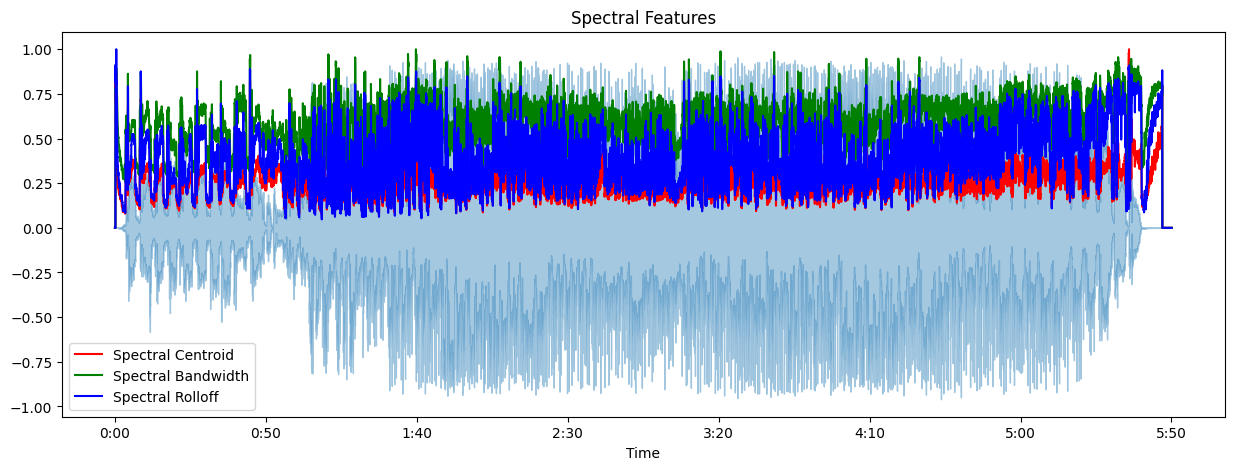

In [2]:
from IPython import get_ipython
from IPython.display import display
#%%
!pip install librosa numpy matplotlib
import librosa
import numpy as np
import matplotlib.pyplot as plt
audio_path = '/content/Tere Hawaale_320(PagalWorld.com.pe).mp3'
y, sr = librosa.load(audio_path)

#calculate MFCC
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
#extract tempo and beat frames
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
#convert beat frames to time
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Access the first element of the tempo array to get the float value
print(f"Tempo: {tempo[0]:.2f} BPM")
print(f"Beat times: {beat_times}")

spectral_centroids=librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_bandwidth=librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
rolloff=librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

frames=range(len(spectral_centroids))
t=librosa.frames_to_time(frames, sr=sr)


plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, librosa.util.normalize(spectral_centroids), color='r', label="Spectral Centroid")
plt.plot(t, librosa.util.normalize(spectral_bandwidth), color='g', label="Spectral Bandwidth")
plt.plot(t, librosa.util.normalize(rolloff), color='b', label="Spectral Rolloff")
plt.legend()
plt.title("Spectral Features")
plt.show()